# 10. Redes Neurais Recorrentes Modernas

Designs complexos que se mostraram bem-sucedidos na prática. Em particular, os designs mais populares apresentam mecanismos para mitigar a notória instabilidade numérica enfrentada pelas RNNs, como tipificada por gradientes que desaparecem e explodem.
Lembre-se de que na Seção 9 lidamos com gradientes que explodem aplicando uma heurística de recorte de gradiente contundente. Apesar da eficácia desse hack, ele deixa em aberto o problema dos gradientes que desaparecem.

Neste capítulo, apresentamos as principais ideias por trás das arquiteturas RNN mais bem-sucedidas para sequências, que derivam de dois artigos. O primeiro, Long Short-Term Memory ( Hochreiter e Schmidhuber, 1997 ) , apresenta a célula de memória , uma unidade de computação que substitui os nós tradicionais na camada oculta de uma rede. Com essas células de memória, as redes são capazes de superar as dificuldades com o treinamento encontradas por redes recorrentes anteriores. Intuitivamente, a célula de memória evita o problema do gradiente de desaparecimento mantendo os valores no estado interno de cada célula de memória em cascata ao longo de uma aresta recorrente com peso 1 em muitos passos de tempo sucessivos. Um conjunto de portas multiplicativas ajuda a rede a determinar não apenas as entradas a serem permitidas no estado de memória, mas quando o conteúdo do estado de memória deve influenciar a saída do modelo.

O segundo artigo, Redes Neurais Recorrentes Bidirecionais ( Schuster e Paliwal, 1997 ) , apresenta uma arquitetura na qual informações do futuro (passos de tempo subsequentes) e do passado (passos de tempo precedentes) são usadas para determinar a saída em qualquer ponto da sequência. Isso contrasta com redes anteriores, nas quais apenas a entrada passada pode afetar a saída. RNNs bidirecionais se tornaram um pilar para tarefas de rotulagem de sequência no processamento de linguagem natural, entre uma miríade de outras tarefas. Felizmente, as duas inovações não são mutuamente exclusivas e foram combinadas com sucesso para classificação de fonemas ( Graves e Schmidhuber, 2005 ) e reconhecimento de caligrafia ( Graves et al. , 2008 ) .

As primeiras seções deste capítulo explicarão a arquitetura LSTM, uma versão mais leve chamada de unidade recorrente com portas (GRU), as principais ideias por trás de RNNs bidirecionais e uma breve explicação de como as camadas de RNNs são empilhadas para formar RNNs profundas. Posteriormente, exploraremos a aplicação de RNNs em tarefas de sequência para sequência, introduzindo a tradução automática junto com ideias-chave, como arquiteturas de codificador-decodificador e busca de feixe 





# 10.1. Long Short-Term Memory (LSTM)

10.1. Memória de Longo Curto Prazo (LSTM)

Logo após as primeiras RNNs no estilo Elman serem treinadas usando retropropagação ( Elman, 1990 ) , os problemas de aprendizado de dependências de longo prazo (devido a gradientes que desaparecem e explodem) tornaram-se salientes, com Bengio e Hochreiter discutindo o problema ( Bengio et al. , 1994 , Hochreiter et al. , 2001 ) . Hochreiter havia articulado esse problema já em 1991 em sua tese de mestrado, embora os resultados não fossem amplamente conhecidos porque a tese foi escrita em alemão.

__Embora o recorte de gradiente ajude com gradientes que explodem, lidar com gradientes que desaparecem parece exigir uma solução mais elaborada.__

- As LSTMs se assemelham a redes neurais recorrentes padrão, mas aqui cada nó recorrente comum é substituído por uma célula de memória . Cada célula de memória contém um estado interno , ou seja, um nó com uma aresta recorrente autoconectada de peso fixo 1, garantindo que o gradiente possa passar por muitos passos de tempo sem desaparecer ou explodir.

O termo “memória de curto prazo longa” vem da seguinte intuição. Redes neurais recorrentes simples têm memória de longo prazo na forma de pesos. Os pesos mudam lentamente durante o treinamento, codificando conhecimento geral sobre os dados. Elas também têm memória de curto prazo na forma de ativações efêmeras, que passam de cada nó para nós sucessivos. __O modelo LSTM introduz um tipo intermediário de armazenamento por meio da CÉLULA DE MEMÓRIA.__ Uma célula de memória é uma unidade composta, construída a partir de nós mais simples em um padrão de conectividade específico, com a nova inclusão de nós multiplicativos.

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

# 10.1.1. Célula de memória com porta

Cada célula de memória está equipada com um estado interno e uma série de portas multiplicativas que determinam se 
- (i) uma determinada entrada deve impactar o estado interno (a __porta de entrada__), 
- (ii) o estado interno deve ser liberado para (o __portão do esquecimento__) e 
- (iii) o estado interno de um determinado neurônio deve ter permissão para impactar a saída da célula (o __portão de saída__).

# 10.1.1.1. Estado oculto fechado

A principal distinção entre RNNs vanilla e LSTMs é que os últimos suportam o gating do estado oculto. 
Isso significa que temos mecanismos dedicados para quando um estado oculto deve ser atualizado e também para quando ele deve ser redefinido .

Lembre-se:
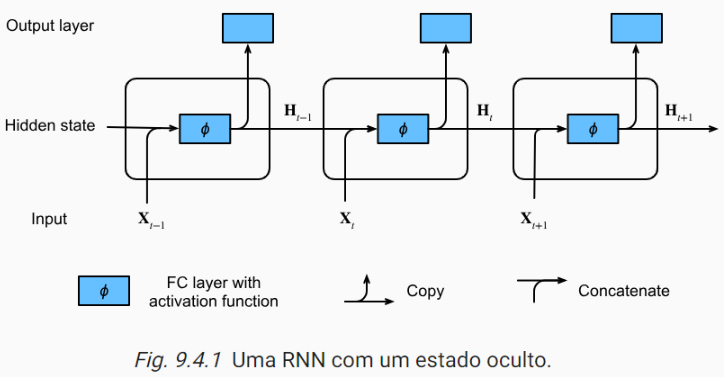


# 10.1.1.2. Porta de entrada, porta de esquecimento e porta de saída

Os dados que alimentam as portas LSTM são:
- a entrada no passo de tempo atual e
- o estado oculto do passo de tempo anterior, conforme ilustrado na Fig. 10.1.1.

Três camadas __totalmente conectadas (FC)__ com funções de ativação __sigmoide__ calculam os valores das portas de entrada, esquecimento e saída. 

Como resultado da ativação sigmoide, todos os valores das três portas estão na faixa de (0,1). 

Além disso, precisamos de um __nó de entrada__, normalmente computado com uma função de ativação __tanh__. 

Intuitivamente, 
- o __portão de entrada__ determina quanto do valor do __nó de entrada__ deve ser adicionado ao estado interno da célula de memória atual. 
- O __portão de esquecimento__ determina se deve manter o valor atual da memória ou liberá-lo. 
- E o __portão de saída__ determina se a célula de memória deve influenciar a saída no passo de tempo atual.

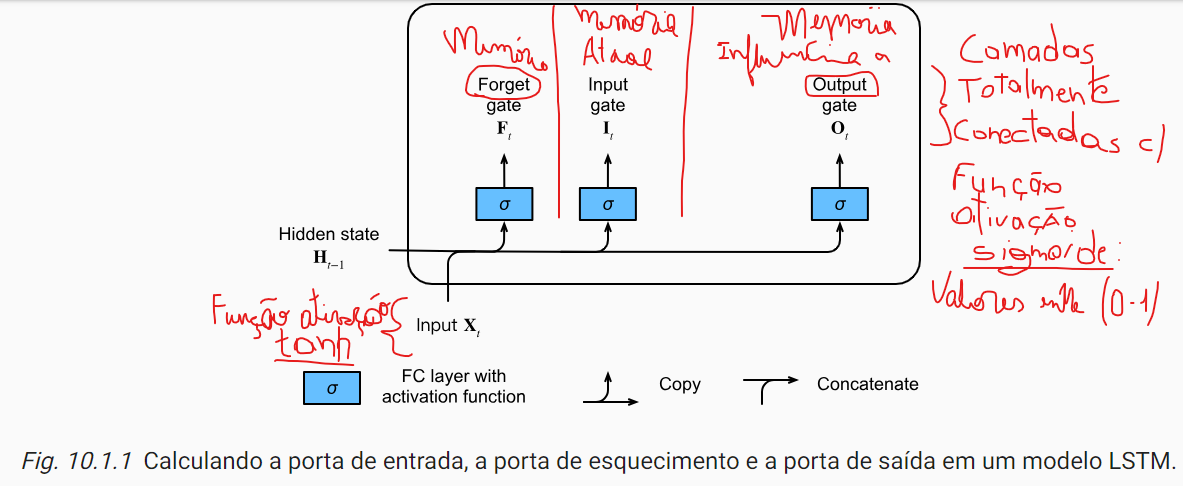



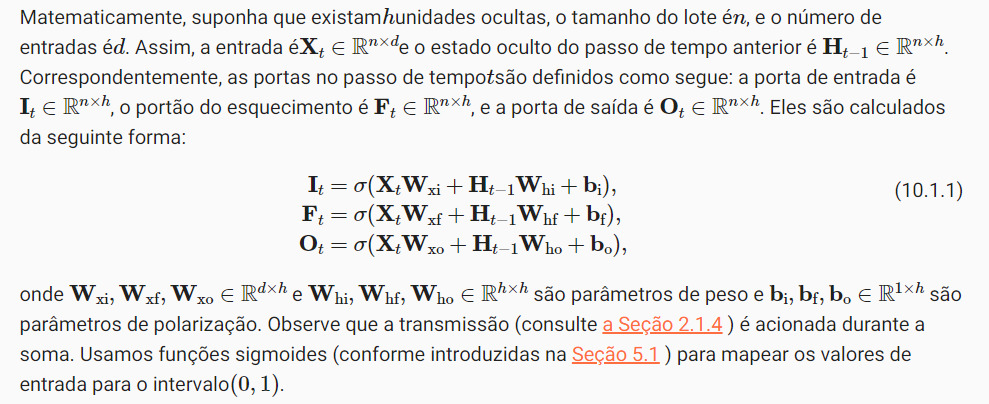


# 10.1.1.3. Nó de entrada

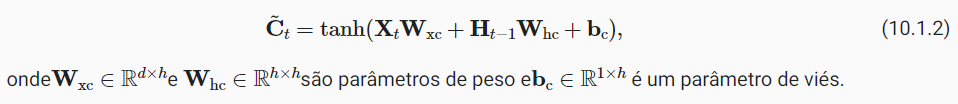

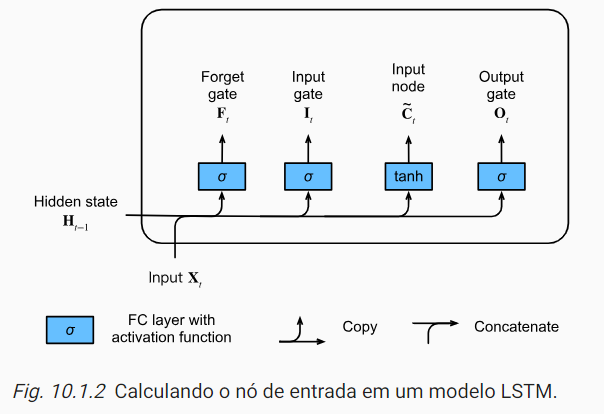

# Produto de Hadamard

O produto de Hadamard, também conhecido como produto elemento a elemento ou produto ponto a ponto, é uma operação entre duas matrizes de mesmas dimensões. Ao contrário do produto matricial padrão, o produto de Hadamard é realizado multiplicando os elementos correspondentes de duas matrizes diretamente.

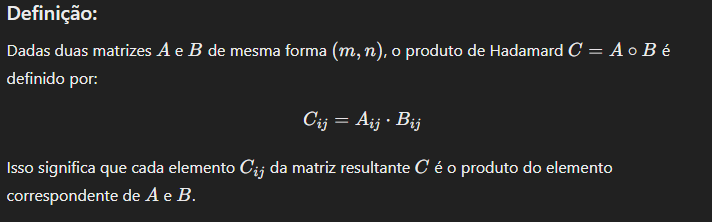

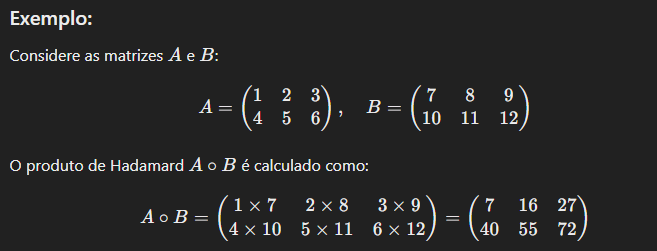

Em NumPy, o produto de Hadamard pode ser realizado simplesmente usando o operador * entre duas matrizes:

In [2]:
import numpy as np

A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[7, 8, 9], [10, 11, 12]])

C = A * B
print(C)


[[ 7 16 27]
 [40 55 72]]


O produto de Hadamard é uma operação elemento a elemento, o que o diferencia do produto matricial tradicional, que envolve a soma de produtos de elementos ao longo de linhas e colunas.

# 10.1.1.4. Estado interno da célula de memória

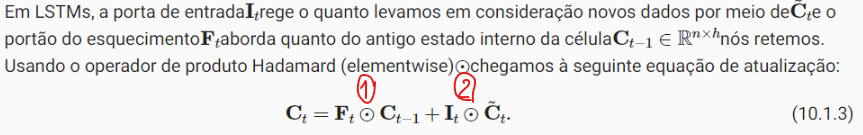

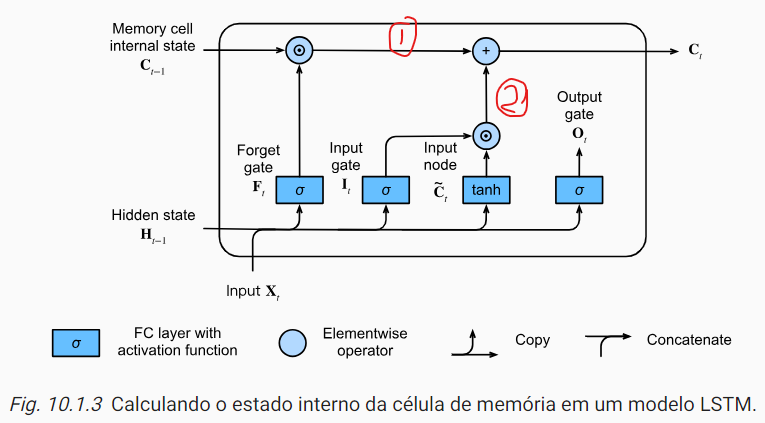

Se a porta de esquecimento for sempre 1 e a porta de entrada for sempre 0, o estado interno da célula de memória C(t-1) permanecerá constante para sempre.

 Na prática, esse design alivia o problema do gradiente de desaparecimento, resultando em modelos que são muito mais fáceis de treinar, especialmente ao enfrentar conjuntos de dados com comprimentos de sequência longos.

# 10.1.1.5. Estado Oculto

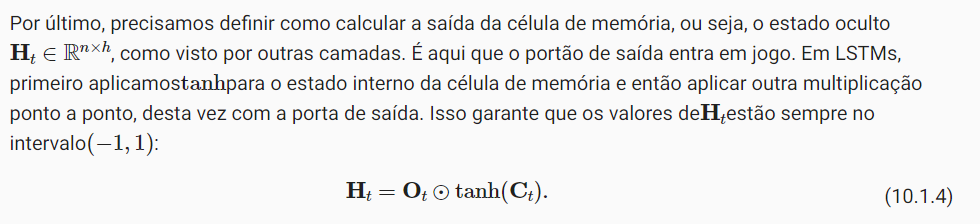

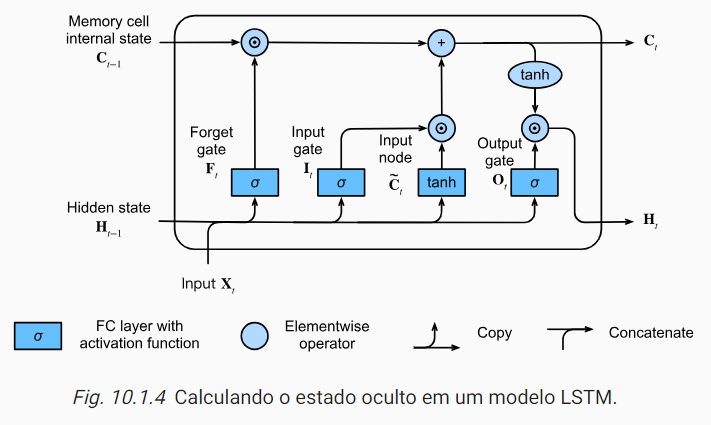



# 10.1.2. Implementação do zero

Agora vamos implementar um LSTM do zero. Assim como os experimentos na Seção 9.5 , primeiro carregamos o conjunto de dados The Time Machine .

# 10.1.2.1. Inicializando Parâmetros do Modelo

Em seguida, precisamos definir e inicializar os parâmetros do modelo. Como anteriormente, o hiperparâmetro __num_hiddens__ determina o número de unidades ocultas. Inicializamos os pesos seguindo uma distribuição gaussiana com desvio padrão de 0,01 e definimos os vieses como 0.

In [3]:
class LSTMScratch(d2l.Module):
    def __init__(self, num_inputs, num_hiddens, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()

        init_weight = lambda *shape: nn.Parameter(torch.randn(*shape) * sigma)
        triple = lambda: (init_weight(num_inputs, num_hiddens),
                          init_weight(num_hiddens, num_hiddens),
                          nn.Parameter(torch.zeros(num_hiddens)))
        self.W_xi, self.W_hi, self.b_i = triple()  # Input gate
        self.W_xf, self.W_hf, self.b_f = triple()  # Forget gate
        self.W_xo, self.W_ho, self.b_o = triple()  # Output gate
        self.W_xc, self.W_hc, self.b_c = triple()  # Input node

O modelo real é definido como descrito acima, consistindo de três gates e um nó de entrada. Note, abaixo, que apenas o estado oculto é passado para a camada de saída.

In [4]:
@d2l.add_to_class(LSTMScratch)
def forward(self, inputs, H_C=None):
    if H_C is None:   # Se a célula LSTM é a primeira e não recebe H,C anterior, H_C=None, então estas variáveis são inicializadas com zeros.
        # Initial state with shape: (batch_size, num_hiddens)
        H = torch.zeros((inputs.shape[1], self.num_hiddens),    # H(t-1);   inputs.shape[1] e o batch_size
                      device=inputs.device)
        C = torch.zeros((inputs.shape[1], self.num_hiddens),    # C(t-1)
                      device=inputs.device)
    else:
        H, C = H_C
    outputs = []
    for X in inputs:
        I = torch.sigmoid(torch.matmul(X, self.W_xi) +
                        torch.matmul(H, self.W_hi) + self.b_i)
        F = torch.sigmoid(torch.matmul(X, self.W_xf) +
                        torch.matmul(H, self.W_hf) + self.b_f)
        O = torch.sigmoid(torch.matmul(X, self.W_xo) +
                        torch.matmul(H, self.W_ho) + self.b_o)
        C_tilde = torch.tanh(torch.matmul(X, self.W_xc) +              # tilde = til = ~
                           torch.matmul(H, self.W_hc) + self.b_c)
        C = F * C + I * C_tilde   # Produto elemento a elemento: *
        H = O * torch.tanh(C)
        outputs.append(H)
    return outputs, (H, C)

# 10.1.2.2. Treinamento e Predição

Vamos treinar um modelo LSTM instanciando a RNNLMScratch classe da Seção 9.5 (Classe para modelo de linguagem (LM)).

In [5]:
class RNNLMScratch(d2l.Classifier):  #@save
    """The RNN-based language model implemented from scratch."""
    def __init__(self, rnn, vocab_size, lr=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.init_params()

    def init_params(self):
        self.W_hq = nn.Parameter(
            torch.randn(
                self.rnn.num_hiddens, self.vocab_size) * self.rnn.sigma)
        self.b_q = nn.Parameter(torch.zeros(self.vocab_size))

    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('ppl', torch.exp(l), train=True)
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('ppl', torch.exp(l), train=False)

# @d2l.add_to_class(RNNLMScratch)  #@save
    def one_hot(self, X):
        # Output shape: (num_steps, batch_size, vocab_size)
        return F.one_hot(X.T, self.vocab_size).type(torch.float32)

# @d2l.add_to_class(RNNLMScratch)  #@save
    def output_layer(self, rnn_outputs):
        outputs = [torch.matmul(H, self.W_hq) + self.b_q for H in rnn_outputs]
        return torch.stack(outputs, 1)

# @d2l.add_to_class(RNNLMScratch)  #@save
    def forward(self, X, state=None):
        embs = self.one_hot(X)
        rnn_outputs, _ = self.rnn(embs, state)
        return self.output_layer(rnn_outputs)

# @d2l.add_to_class(RNNLMScratch)  #@save
    def predict(self, prefix, num_preds, vocab, device=None):
        state, outputs = None, [vocab[prefix[0]]]
        for i in range(len(prefix) + num_preds - 1):
            X = torch.tensor([[outputs[-1]]], device=device)
            embs = self.one_hot(X)
            rnn_outputs, state = self.rnn(embs, state)
            if i < len(prefix) - 1:  # Warm-up period
                outputs.append(vocab[prefix[i + 1]])
            else:  # Predict num_preds steps
                Y = self.output_layer(rnn_outputs)
                outputs.append(int(Y.argmax(axis=2).reshape(1)))
        return ''.join([vocab.idx_to_token[i] for i in outputs])



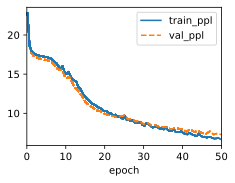

In [6]:
data = d2l.TimeMachine(batch_size=1024, num_steps=32)
lstm = LSTMScratch(num_inputs=len(data.vocab), num_hiddens=32)          # rede LSTM.
model = d2l.RNNLMScratch(lstm, vocab_size=len(data.vocab), lr=4)        # classe própria para modelo de linguagem (LM) utilizando LSTM como rede RNN. Importada de d2l.
trainer = d2l.Trainer(max_epochs=50, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [9]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

'it has a diment and the th'

In [10]:
#----------------------------------------------------------------------------------------------------
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cuda')
device = torch.device('cpu')
model = model.to(device)    


X, y = next(iter(data.get_dataloader(False)))
y_hat = model(X) 
torch.exp(model.loss(y_hat,y)).item()               # loss

7.525129795074463

# Código Agrupado

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

# --------------------------------------------------------------------------------------------------------------

class LSTMScratch(d2l.Module):
    def __init__(self, num_inputs, num_hiddens, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()

        init_weight = lambda *shape: nn.Parameter(torch.randn(*shape) * sigma)
        triple = lambda: (init_weight(num_inputs, num_hiddens),
                          init_weight(num_hiddens, num_hiddens),
                          nn.Parameter(torch.zeros(num_hiddens)))
        self.W_xi, self.W_hi, self.b_i = triple()  # Input gate
        self.W_xf, self.W_hf, self.b_f = triple()  # Forget gate
        self.W_xo, self.W_ho, self.b_o = triple()  # Output gate
        self.W_xc, self.W_hc, self.b_c = triple()  # Input node

# --------------------------------------------------------------------------------------------------------------

@d2l.add_to_class(LSTMScratch)
def forward(self, inputs, H_C=None):
    if H_C is None:   # Se a célula LSTM é a primeira e não recebe H,C anterior, H_C=None, então estas variáveis são inicializadas com zeros.
        # Initial state with shape: (batch_size, num_hiddens)
        H = torch.zeros((inputs.shape[1], self.num_hiddens),    # H(t-1);   inputs.shape[1] e o batch_size
                      device=inputs.device)
        C = torch.zeros((inputs.shape[1], self.num_hiddens),    # C(t-1)
                      device=inputs.device)
    else:
        H, C = H_C
    outputs = []
    for X in inputs:
        I = torch.sigmoid(torch.matmul(X, self.W_xi) +
                        torch.matmul(H, self.W_hi) + self.b_i)
        F = torch.sigmoid(torch.matmul(X, self.W_xf) +
                        torch.matmul(H, self.W_hf) + self.b_f)
        O = torch.sigmoid(torch.matmul(X, self.W_xo) +
                        torch.matmul(H, self.W_ho) + self.b_o)
        C_tilde = torch.tanh(torch.matmul(X, self.W_xc) +              # tilde = til = ~
                           torch.matmul(H, self.W_hc) + self.b_c)
        C = F * C + I * C_tilde   # Produto elemento a elemento: *
        H = O * torch.tanh(C)
        outputs.append(H)
    return outputs, (H, C)

# --------------------------------------------------------------------------------------------------------------

data = d2l.TimeMachine(batch_size=1024, num_steps=32)
lstm = LSTMScratch(num_inputs=len(data.vocab), num_hiddens=32)          # rede LSTM.
model = d2l.RNNLMScratch(lstm, vocab_size=len(data.vocab), lr=4)        # RNNLMScratch é classe própria para modelo de linguagem (LM) utilizando LSTM como rede RNN. Importada de d2l.
trainer = d2l.Trainer(max_epochs=50, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [ ]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

In [ ]:
#----------------------------------------------------------------------------------------------------
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cuda')
device = torch.device('cpu')
model = model.to(device)    


X, y = next(iter(data.get_dataloader(False)))
y_hat = model(X) 
torch.exp(model.loss(y_hat,y)).item()               # loss

# 10.1.3. Implementação concisa

Usando APIs de alto nível, podemos instanciar diretamente um modelo LSTM. 

__Isso encapsula todos os detalhes de configuração que tornamos explícitos acima.__

__O código é significativamente mais rápido, pois usa operadores compilados em vez de Python para muitos detalhes que explicamos antes.__

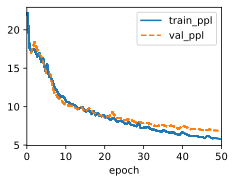

In [11]:
class LSTM(d2l.RNN):
    def __init__(self, num_inputs, num_hiddens):
        d2l.Module.__init__(self)            
        self.save_hyperparameters()
        self.rnn = nn.LSTM(num_inputs, num_hiddens)             # num_inputs: d  ; num_hiddens: h
        # Configurações encapsuladas em d2l.Module e torch.nn

    def forward(self, inputs, H_C=None):
        return self.rnn(inputs, H_C)

lstm = LSTM(num_inputs=len(data.vocab), num_hiddens=32)
model = d2l.RNNLM(lstm, vocab_size=len(data.vocab), lr=4) # RNNLM é classe própria para modelo de linguagem (LM) utilizando LSTM como rede RNN. Importada de d2l.
trainer.fit(model, data)

In [12]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

'it has a the the the the t'

In [13]:
#----------------------------------------------------------------------------------------------------
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cuda')
device = torch.device('cpu')
model = model.to(device)    


X, y = next(iter(data.get_dataloader(False)))
y_hat = model(X) 
torch.exp(model.loss(y_hat,y)).item()               # loss

6.799340724945068

Utilizando a API de alto nível, loss reduziu de 7.525129795074463 para 6.799340724945068.

# Código Conciso Agrupado

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

# --------------------------------------------------------------------------------------------------------------

class LSTM(d2l.RNN):
    def __init__(self, num_inputs, num_hiddens):
        d2l.Module.__init__(self)
        self.save_hyperparameters()
        self.rnn = nn.LSTM(num_inputs, num_hiddens)             # num_inputs: d  ; num_hiddens: h
        # Configurações encapsuladas em d2l.Module e torch.nn

    def forward(self, inputs, H_C=None):
        return self.rnn(inputs, H_C)

# --------------------------------------------------------------------------------------------------------------

data = d2l.TimeMachine(batch_size=1024, num_steps=32)
lstm = LSTM(num_inputs=len(data.vocab), num_hiddens=32)
model = d2l.RNNLM(lstm, vocab_size=len(data.vocab), lr=4) # RNNLM é classe própria para modelo de linguagem (LM) utilizando LSTM como rede RNN. Importada de d2l.
trainer = d2l.Trainer(max_epochs=50, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [ ]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

In [ ]:
#----------------------------------------------------------------------------------------------------
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cuda')
device = torch.device('cpu')
model = model.to(device)    


X, y = next(iter(data.get_dataloader(False)))
y_hat = model(X) 
torch.exp(model.loss(y_hat,y)).item()               # loss

LSTMs são o modelo autorregressivo de variável latente prototípico com controle de estado não trivial. Muitas variantes dele foram propostas ao longo dos anos, por exemplo, múltiplas camadas, conexões residuais, diferentes tipos de regularização. No entanto, treinar LSTMs e outros modelos de sequência (como GRUs) é bastante custoso devido à dependência de longo alcance da sequência. Mais tarde, encontraremos modelos alternativos, como Transformers, que podem ser usados em alguns casos.

# 10.1.4. Resumo

Embora os LSTMs tenham sido publicados em 1997, eles ganharam grande destaque com algumas vitórias em competições de previsão em meados dos anos 2000 e se tornaram os modelos dominantes para aprendizado de sequências de 2011 até o surgimento dos modelos Transformer, a partir de 2017. Até mesmo os Transformers devem algumas de suas principais ideias às inovações de design de arquitetura introduzidas pelo LSTM.

LSTMs têm três tipos de portas: portas de entrada, portas de esquecimento e portas de saída que controlam o fluxo de informações. A saída da camada oculta do LSTM inclui o estado oculto e o estado interno da célula de memória. Apenas o estado oculto é passado para a camada de saída, enquanto o estado interno da célula de memória permanece inteiramente interno. LSTMs podem aliviar gradientes de desaparecimento e explosão.

# 10.1.5. Exercícios

# Ex. 1 - Ajuste os hiperparâmetros e analise sua influência no tempo de execução, na perplexidade e na sequência de saída.

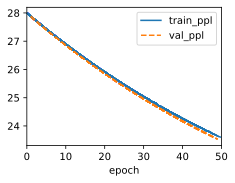

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l
# --------------------------------------------------------------------------------------------------------------

class LSTMScratch(d2l.Module):
    def __init__(self, num_inputs, num_hiddens, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()

        init_weight = lambda *shape: nn.Parameter(torch.randn(*shape) * sigma)
        triple = lambda: (init_weight(num_inputs, num_hiddens),
                          init_weight(num_hiddens, num_hiddens),
                          nn.Parameter(torch.zeros(num_hiddens)))
        self.W_xi, self.W_hi, self.b_i = triple()  # Input gate
        self.W_xf, self.W_hf, self.b_f = triple()  # Forget gate
        self.W_xo, self.W_ho, self.b_o = triple()  # Output gate
        self.W_xc, self.W_hc, self.b_c = triple()  # Input node

# --------------------------------------------------------------------------------------------------------------

@d2l.add_to_class(LSTMScratch)
def forward(self, inputs, H_C=None):
    if H_C is None:   # Se a célula LSTM é a primeira e não recebe H,C anterior, H_C=None, então estas variáveis são inicializadas com zeros.
        # Initial state with shape: (batch_size, num_hiddens)
        H = torch.zeros((inputs.shape[1], self.num_hiddens),    # H(t-1);   inputs.shape[1] e o batch_size
                      device=inputs.device)
        C = torch.zeros((inputs.shape[1], self.num_hiddens),    # C(t-1)
                      device=inputs.device)
    else:
        H, C = H_C
    outputs = []
    for X in inputs:
        I = torch.sigmoid(torch.matmul(X, self.W_xi) +
                        torch.matmul(H, self.W_hi) + self.b_i)
        F = torch.sigmoid(torch.matmul(X, self.W_xf) +
                        torch.matmul(H, self.W_hf) + self.b_f)
        O = torch.sigmoid(torch.matmul(X, self.W_xo) +
                        torch.matmul(H, self.W_ho) + self.b_o)
        C_tilde = torch.tanh(torch.matmul(X, self.W_xc) +              # tilde = til = ~
                           torch.matmul(H, self.W_hc) + self.b_c)
        C = F * C + I * C_tilde   # Produto elemento a elemento: *
        H = O * torch.tanh(C)
        outputs.append(H)
    return outputs, (H, C)

# --------------------------------------------------------------------------------------------------------------

from sklearn.model_selection import ParameterGrid

def experient(num_steps=8, num_hiddens=8, lr=0.01):
    data = d2l.TimeMachine(batch_size=1024, num_steps=num_steps)
    lstm = LSTMScratch(num_inputs=len(data.vocab), num_hiddens=num_hiddens, sigma=0.01)          # rede LSTM.
    model = d2l.RNNLMScratch(lstm, vocab_size=len(data.vocab), lr=lr)        # RNNLMScratch é classe própria para modelo de linguagem (LM) utilizando LSTM como rede RNN. Importada de d2l.
    trainer = d2l.Trainer(max_epochs=50, gradient_clip_val=1, num_gpus=1)
    trainer.fit(model, data)

    device = torch.device('cpu')
    model = model.to(device) 
    X, y = next(iter(data.get_dataloader(False)))
    y_hat = model(X)
    return torch.exp(model.loss(y_hat, y)).item()

param_grid = {'num_steps':[8, 16, 32, 64],    # 4 possibilidades
              'num_hiddens':[8, 16, 32, 64],  # 4 possibilidades
              'lr':[0.01, 0.1, 4, 10]}        # 4 possibilidades  
                                              # Total: 64 possibilidades

param_grid_obj = ParameterGrid(param_grid)         # ParameterGrid gera todas as combinações possíveis dos valores dos parâmetros em param_grid
ppls = []
for params in param_grid_obj:
    ppl = experient(**params)
    ppls.append(ppl)
    print(f'params: {params},\nppl: {ppl}\n')        # ppl[::-1] mostra a lista espelhada, para ficar na mesma disposição de params 
    # print(params) 
# --------------------------------------------------------------------------------------------------------------

    # print(f'params: {params},\nppl: {ppl[::-1]}\n')        # ppl[::-1] mostra a lista espelhada, para ficar na mesma disposição de params 




https://colab.research.google.com/drive/1gbPgDPIS2eBw6mDV7AIm55QD68aEXYpb?authuser=1#scrollTo=U-aMRUwtkuVp

----------------

- Parâmetros testados:

In [13]:
from sklearn.model_selection import ParameterGrid


def funcao_generica(lr=1, num_hiddens=32, num_steps=32):
    num_steps = num_steps                                   # atualiza os parâmetros
    num_hiddens = num_hiddens                               # atualiza os parâmetros
    lr = lr                                                 # atualiza os parâmetros
    return num_steps, num_hiddens, lr                       # retorna os parâmetros atualizados



# Dicionário de parâmetros:
param_grid = {'num_steps':[8, 16, 32, 64],    # 4 possibilidades
              'num_hiddens':[8, 16, 32, 64],  # 4 possibilidades
              'lr':[0.01, 0.1, 4, 10]}        # 4 possibilidades
                                              # Total: 64 possibilidades a serem testadas

grid = ParameterGrid(param_grid)              # ParameterGrid é a função da biblioteca sklearn
ppls = []

# Todas as possibilidades testadas na funcao_generica
for params in grid:
    ppl = funcao_generica(**params)
    ppls.append(ppl)
    print(f'params: {params},\nppl: {ppl[::-1]}\n')        # ppl[::-1] mostra a lista espelhada, para ficar na mesma disposição de params 
    # print(params) 

params: {'lr': 0.01, 'num_hiddens': 8, 'num_steps': 8},
ppl: (0.01, 8, 8)

params: {'lr': 0.01, 'num_hiddens': 8, 'num_steps': 16},
ppl: (0.01, 8, 16)

params: {'lr': 0.01, 'num_hiddens': 8, 'num_steps': 32},
ppl: (0.01, 8, 32)

params: {'lr': 0.01, 'num_hiddens': 8, 'num_steps': 64},
ppl: (0.01, 8, 64)

params: {'lr': 0.01, 'num_hiddens': 16, 'num_steps': 8},
ppl: (0.01, 16, 8)

params: {'lr': 0.01, 'num_hiddens': 16, 'num_steps': 16},
ppl: (0.01, 16, 16)

params: {'lr': 0.01, 'num_hiddens': 16, 'num_steps': 32},
ppl: (0.01, 16, 32)

params: {'lr': 0.01, 'num_hiddens': 16, 'num_steps': 64},
ppl: (0.01, 16, 64)

params: {'lr': 0.01, 'num_hiddens': 32, 'num_steps': 8},
ppl: (0.01, 32, 8)

params: {'lr': 0.01, 'num_hiddens': 32, 'num_steps': 16},
ppl: (0.01, 32, 16)

params: {'lr': 0.01, 'num_hiddens': 32, 'num_steps': 32},
ppl: (0.01, 32, 32)

params: {'lr': 0.01, 'num_hiddens': 32, 'num_steps': 64},
ppl: (0.01, 32, 64)

params: {'lr': 0.01, 'num_hiddens': 64, 'num_steps': 8},
ppl: (0.0

Melhor resultado: 6.388012886047363

params: {'lr': 10, 'num_hiddens': 32, 'num_steps': 64},
ppl: (10, 32, 64)

--------------------

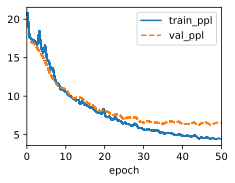

In [14]:
import torch
from torch import nn
from d2l import torch as d2l

# --------------------------------------------------------------------------------------------------------------

class LSTMScratch(d2l.Module):
    def __init__(self, num_inputs, num_hiddens, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()

        init_weight = lambda *shape: nn.Parameter(torch.randn(*shape) * sigma)
        triple = lambda: (init_weight(num_inputs, num_hiddens),
                          init_weight(num_hiddens, num_hiddens),
                          nn.Parameter(torch.zeros(num_hiddens)))
        self.W_xi, self.W_hi, self.b_i = triple()  # Input gate
        self.W_xf, self.W_hf, self.b_f = triple()  # Forget gate
        self.W_xo, self.W_ho, self.b_o = triple()  # Output gate
        self.W_xc, self.W_hc, self.b_c = triple()  # Input node

# --------------------------------------------------------------------------------------------------------------

@d2l.add_to_class(LSTMScratch)
def forward(self, inputs, H_C=None):
    if H_C is None:   # Se a célula LSTM é a primeira e não recebe H,C anterior, H_C=None, então estas variáveis são inicializadas com zeros.
        # Initial state with shape: (batch_size, num_hiddens)
        H = torch.zeros((inputs.shape[1], self.num_hiddens),    # H(t-1);   inputs.shape[1] e o batch_size
                      device=inputs.device)
        C = torch.zeros((inputs.shape[1], self.num_hiddens),    # C(t-1)
                      device=inputs.device)
    else:
        H, C = H_C
    outputs = []
    for X in inputs:
        I = torch.sigmoid(torch.matmul(X, self.W_xi) +
                        torch.matmul(H, self.W_hi) + self.b_i)
        F = torch.sigmoid(torch.matmul(X, self.W_xf) +
                        torch.matmul(H, self.W_hf) + self.b_f)
        O = torch.sigmoid(torch.matmul(X, self.W_xo) +
                        torch.matmul(H, self.W_ho) + self.b_o)
        C_tilde = torch.tanh(torch.matmul(X, self.W_xc) +              # tilde = til = ~
                           torch.matmul(H, self.W_hc) + self.b_c)
        C = F * C + I * C_tilde   # Produto elemento a elemento: *
        H = O * torch.tanh(C)
        outputs.append(H)
    return outputs, (H, C)

# --------------------------------------------------------------------------------------------------------------

data = d2l.TimeMachine(batch_size=1024, num_steps=64)
lstm = LSTMScratch(num_inputs=len(data.vocab), num_hiddens=32)          # rede LSTM.
model = d2l.RNNLMScratch(lstm, vocab_size=len(data.vocab), lr=10)        # RNNLMScratch é classe própria para modelo de linguagem (LM) utilizando LSTM como rede RNN. Importada de d2l.
trainer = d2l.Trainer(max_epochs=50, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [15]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

'it has of there there the '

In [16]:
#----------------------------------------------------------------------------------------------------
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cuda')
device = torch.device('cpu')
model = model.to(device)    


X, y = next(iter(data.get_dataloader(False)))
y_hat = model(X) 
torch.exp(model.loss(y_hat,y)).item()               # loss

6.34576940536499

# Ex. 2 - Como você precisaria alterar o modelo para gerar palavras adequadas em vez de apenas sequências de caracteres?

In [ ]:
@d2l.add_to_class(TimeMachine)  #@save
def _tokenize_word(self, text):
    return text.split()

# Ex. 3 - Compare o custo computacional para GRUs, LSTMs e RNNs regulares para uma dada dimensão oculta. Preste atenção especial ao custo de treinamento e inferência.

Medindo uso de memória com tracemalloc

O módulo tracemalloc permite rastrear a alocação de memória no Python, ajudando a entender o consumo de memória de um programa.

- RNN:

Memória usada: 15578096 bytes
Pico de uso de memória: 58384636 bytes


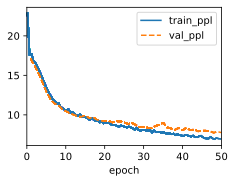

In [9]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l
import tracemalloc

#----------------------------------------------------------------------------------------------------

class RNN(d2l.Module):  #@save
    """The RNN model implemented with high-level APIs."""
    def __init__(self, num_inputs, num_hiddens):
        super().__init__()
        self.save_hyperparameters()
        self.rnn = nn.RNN(num_inputs, num_hiddens)                         # API de alto nível. Substitui a classe RNNScratch

    def forward(self, inputs, H=None):
        return self.rnn(inputs, H)

#----------------------------------------------------------------------------------------------------

class RNNLM(d2l.RNNLMScratch):                                              # Substitui a classe RNNLMScratch, que agora é classe pai.   
    """The RNN-based language model implemented with high-level APIs."""
    def init_params(self):
        self.linear = nn.LazyLinear(self.vocab_size)                        # camada de saída totalmente conectada.

    def output_layer(self, hiddens):
        return self.linear(hiddens).swapaxes(0, 1)                          # usada para trocar dois eixos (ou dimensões) de um array

#----------------------------------------------------------------------------------------------------

tracemalloc.start()  # Inicia o rastreamento de memória
inicio_mem, _ = tracemalloc.get_traced_memory()  # Pega a memória inicial

#----------------------------------------------------------------------------------------------------

data = d2l.TimeMachine(batch_size=1024, num_steps=32)
rnn = RNN(num_inputs=len(data.vocab), num_hiddens=32)
model = RNNLM(rnn, vocab_size=len(data.vocab), lr=1)
# model.predict('it has', 20, data.vocab)

#----------------------------------------------------------------------------------------------------

trainer = d2l.Trainer(max_epochs=50, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

#----------------------------------------------------------------------------------------------------

fim_mem, pico_mem = tracemalloc.get_traced_memory()  # Pega a memória final
tracemalloc.stop()  # Para o rastreamento

print(f"Memória usada: {fim_mem - inicio_mem} bytes")
print(f"Pico de uso de memória: {pico_mem} bytes")

In [ ]:
#----------------------------------------------------------------------------------------------------

model.predict('it has', 20, data.vocab, d2l.try_gpu())

In [ ]:
#----------------------------------------------------------------------------------------------------

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cuda')
device = torch.device('cpu')
model = model.to(device)    

X, y = next(iter(data.get_dataloader(False)))
y_hat = model(X) 
torch.exp(model.loss(y_hat,y)).item()               # loss

- LSTM:

Memória usada: 12773700 bytes
Pico de uso de memória: 58378538 bytes


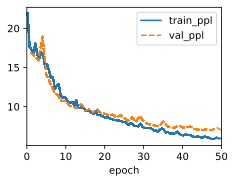

In [4]:
import torch
from torch import nn
from d2l import torch as d2l
import tracemalloc

# --------------------------------------------------------------------------------------------------------------

class LSTM(d2l.RNN):
    def __init__(self, num_inputs, num_hiddens):
        d2l.Module.__init__(self)
        self.save_hyperparameters()
        self.rnn = nn.LSTM(num_inputs, num_hiddens)             # num_inputs: d  ; num_hiddens: h
        # Configurações encapsuladas em d2l.Module e torch.nn

    def forward(self, inputs, H_C=None):
        return self.rnn(inputs, H_C)

#----------------------------------------------------------------------------------------------------

tracemalloc.start()  # Inicia o rastreamento de memória
inicio_mem, _ = tracemalloc.get_traced_memory()  # Pega a memória inicial

#----------------------------------------------------------------------------------------------------

data = d2l.TimeMachine(batch_size=1024, num_steps=32)
lstm = LSTM(num_inputs=len(data.vocab), num_hiddens=32)
model = d2l.RNNLM(lstm, vocab_size=len(data.vocab), lr=4) # RNNLM é classe própria para modelo de linguagem (LM) utilizando LSTM como rede RNN. Importada de d2l.
trainer = d2l.Trainer(max_epochs=50, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

#----------------------------------------------------------------------------------------------------

fim_mem, pico_mem = tracemalloc.get_traced_memory()  # Pega a memória final
tracemalloc.stop()  # Para o rastreamento

print(f"Memória usada: {fim_mem - inicio_mem} bytes")
print(f"Pico de uso de memória: {pico_mem} bytes")

In [7]:
#----------------------------------------------------------------------------------------------------

model.predict('it has', 20, data.vocab)

#----------------------------------------------------------------------------------------------------

'it has said the time the t'

In [8]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cuda')
device = torch.device('cpu')
model = model.to(device)    

X, y = next(iter(data.get_dataloader(False)))
y_hat = model(X) 
torch.exp(model.loss(y_hat,y)).item()               # loss

6.9586310386657715

# Ex. 4 - Como a célula de memória candidata garante que o intervalo de valores esteja entre -1 e 1 usando a função tanh, por que o estado oculto precisa usar a função tanh novamente para garantir que o intervalo de valor de saída esteja entre -1 e 1?

Ht = Ot*tang(Ct)

Ct = Ft*C(t-1) + It*C_til_t

C_til_t possui função de ativação tanh, entretanto, as demais variáveis possuem função de ativação sigmóide. Ht possui em suja composição as demais variáveis. Logo, aplicar novamente a função de ativação tanh garante que Ht esteja entre -1 e 1.

# Ex. 5 - Implemente um modelo LSTM para previsão de séries temporais em vez de previsão de sequência de caracteres.

In [10]:
import torch
from torch import nn
from d2l import torch as d2l

class Data(d2l.DataModule):                                                      # cap09_9.1-Trabalhando com sequências.ipynb
    def __init__(self, batch_size=16, T=1000, num_train=600, tau=4, randn=0.2):
        self.save_hyperparameters()
        self.time = torch.range(1, T, dtype=torch.float32)
        self.x = torch.sin(0.01*self.time) + torch.randn(T)*randn
        
    def get_dataloader(self, train):
        features = [self.x[i:self.T-self.tau+i] for i in range(self.tau)]
        self.features = torch.stack(features, 1)
        self.labels = self.x[self.tau:].reshape((-1, 1))
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.features, self.labels], train, i)
    
class RNNAutoRegression(d2l.LinearRegression):  #@save
    """The RNN-based language model implemented with high-level APIs."""
    def init_params(self):
        self.linear = nn.LazyLinear(1)

    # def output_layer(self, hiddens):
    #     return self.linear(hiddens).swapaxes(0, 1)
    
    def __init__(self, rnn, lr=0.01, tau=4, plot_flag=True, emb_len=8):
        super().__init__(lr=lr)
        self.save_hyperparameters()
        self.init_params()   

    def forward(self, X, state=None):
        rnn_outputs, _ = self.rnn(X, state)
        return self.linear(rnn_outputs)
        # return rnn_outputs

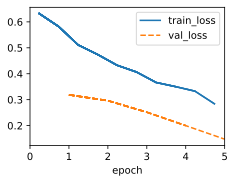

In [11]:
tau=4
data = Data(tau=tau)
lstm = LSTM(num_inputs=tau, num_hiddens=8)
model = RNNAutoRegression(rnn=lstm, lr=0.01)
# model = d2l.LinearRegression(lr=0.01)
trainer = d2l.Trainer(max_epochs=5)
trainer.fit(model, data)

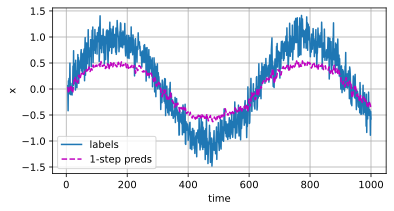

In [12]:
onestep_preds = model(data.features).detach().numpy()
d2l.plot(data.time[data.tau:], [data.labels, onestep_preds], 'time', 'x',
         legend=['labels', '1-step preds'], figsize=(6, 3))

# Outras respostas:

https://pandalab.me/archives/lstm

# Referências

https://pytorch.org/docs/stable/nn.html#recurrent-layers

https://pytorch.org/docs/stable/generated/torch.nn.RNNCell.html

https://pytorch.org/docs/stable/generated/torch.nn.RNNBase.html#torch.nn.RNNBase

https://pytorch.org/docs/stable/generated/torch.nn.LSTMCell.html#torch.nn.LSTMCell

https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html#torch.nn.LSTM

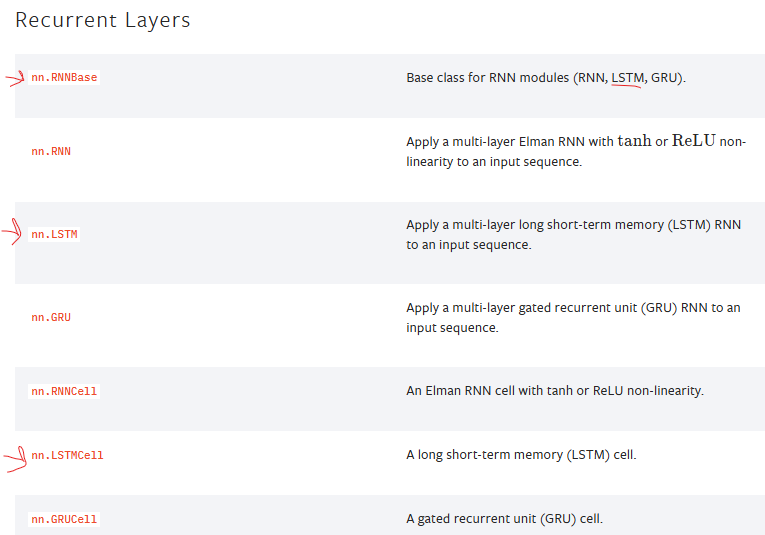